In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
# Load training and validation data
df = pd.read_csv("twitter_training.csv")
dv= pd.read_csv("twitter_validation.csv")

In [3]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
dv.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [5]:
#preprocess data

df.rename(columns={'2401': 'id',
                   'Borderlands':'Name',
                  'Positive': 'Feedback',
                  'im getting on borderlands and i will murder you all ,': 'text'}, inplace=True)

In [6]:
#preprocess data

dv.rename(columns={'3364': 'id',
                   'Facebook':'Name',
                  'Irrelevant': 'Feedback',
                  'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣': 'text'}, inplace=True)

In [7]:
df.head()

,id,Name,Feedback,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
dv.head()

,id,Name,Feedback,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [9]:
df.shape

(74681, 4)

In [10]:
dv.shape

(999, 4)

In [11]:
df.isnull().sum()

id            0
Name          0
Feedback      0
text        686
dtype: int64

In [12]:
dv.isnull().sum()

id          0
Name        0
Feedback    0
text        0
dtype: int64

In [13]:
686/74681*100

0.9185736666622032

In [14]:
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        73995 non-null  int64 
 1   Name      73995 non-null  object
 2   Feedback  73995 non-null  object
 3   text      73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


Train Data

In [16]:
# view all Feedback

temp = df.groupby('Feedback').count()['id'].reset_index().sort_values(by='id',ascending=False)
temp.style.background_gradient()

,Feedback,id
1,Negative,22358
3,Positive,20654
2,Neutral,18108
0,Irrelevant,12875


<AxesSubplot: xlabel='Feedback', ylabel='count'>

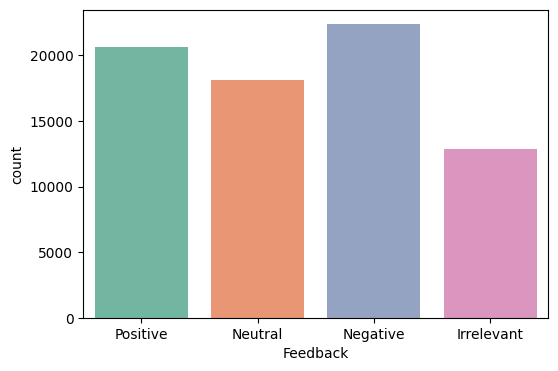

In [17]:
# plot sentiment graph

plt.figure(figsize=(6,4))
sns.countplot(x='Feedback',data=df, palette='Set2')

In [18]:
# Calculate class counts
class_counts = df['Feedback'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

# Calculate the total number of images in train_df
total_images = len(df)

total_images

73995

In [19]:
# Calculate the percentage for each class based on the total number of images
class_counts['Percentage'] = (class_counts['Count'] / total_images) * 100

# Sort the dataframe by count
class_counts = class_counts.sort_values(by='Count', ascending=False)

class_counts

,Class,Count,Percentage
0,Negative,22358,30.215555
1,Positive,20654,27.912697
2,Neutral,18108,24.471924
3,Irrelevant,12875,17.399824


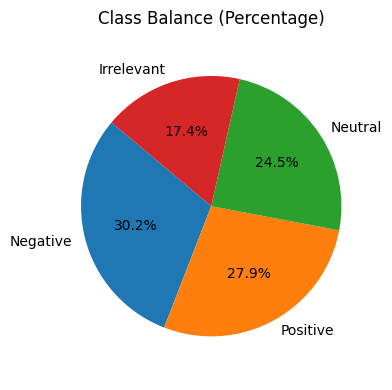

In [20]:
# Create the pie chart using matplotlib
plt.figure(figsize=(4, 4))
plt.pie(class_counts['Percentage'], labels=class_counts['Class'], autopct='%1.1f%%', startangle=140)
plt.title('Class Balance (Percentage)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


In [21]:
# remove punctuation

df.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [22]:
df.head()

,id,Name,Feedback,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [23]:
# only string column
columns = df.columns[1::] 
columns

Index(['Name', 'Feedback', 'text'], dtype='object')

In [24]:
# convert to lower case

for col in columns:
    df[col] = df[col].str.lower()
df.head(5)

,id,Name,Feedback,text
0,2401,borderlands,positive,i am coming to the borders and i will kill you...
1,2401,borderlands,positive,im getting on borderlands and i will kill you ...
2,2401,borderlands,positive,im coming on borderlands and i will murder you...
3,2401,borderlands,positive,im getting on borderlands and i will murder ...
4,2401,borderlands,positive,im getting into borderlands and i can murder y...


In [25]:
# give numerical label for easy prediction

df['Feedback'] = df['Feedback'].map({'negative': 0, 'positive': 1, 'neutral' : 2, 'irrelevant' : 3})
df['Feedback'].head()

0    1
1    1
2    1
3    1
4    1
Name: Feedback, dtype: int64

In [26]:
df.head()

,id,Name,Feedback,text
0,2401,borderlands,1,i am coming to the borders and i will kill you...
1,2401,borderlands,1,im getting on borderlands and i will kill you ...
2,2401,borderlands,1,im coming on borderlands and i will murder you...
3,2401,borderlands,1,im getting on borderlands and i will murder ...
4,2401,borderlands,1,im getting into borderlands and i can murder y...


In [27]:
 # join the  Name & text for apply CountVectorizer

df['tweet'] = df['Name'] + ' ' + df['text']
df['tweet'].head()

0    borderlands i am coming to the borders and i w...
1    borderlands im getting on borderlands and i wi...
2    borderlands im coming on borderlands and i wil...
3    borderlands im getting on borderlands   and i ...
4    borderlands im getting into borderlands and i ...
Name: tweet, dtype: object

In [28]:
df.head()

,id,Name,Feedback,text,tweet
0,2401,borderlands,1,i am coming to the borders and i will kill you...,borderlands i am coming to the borders and i w...
1,2401,borderlands,1,im getting on borderlands and i will kill you ...,borderlands im getting on borderlands and i wi...
2,2401,borderlands,1,im coming on borderlands and i will murder you...,borderlands im coming on borderlands and i wil...
3,2401,borderlands,1,im getting on borderlands and i will murder ...,borderlands im getting on borderlands and i ...
4,2401,borderlands,1,im getting into borderlands and i can murder y...,borderlands im getting into borderlands and i ...


In [29]:
df.drop(columns=['id','Name','text'],inplace=True)

In [30]:
df.tail()

,Feedback,tweet
74676,1,nvidia just realized that the windows partitio...
74677,1,nvidia just realized that my mac window partit...
74678,1,nvidia just realized the windows partition of ...
74679,1,nvidia just realized between the windows parti...
74680,1,nvidia just like the windows partition of my m...


Test Data

In [31]:
dv.shape

(999, 4)

In [32]:
# remove punctuation

dv.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [33]:
dv.head()

,id,Name,Feedback,text
0,352,Amazon,Neutral,BBC News Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,Microsoft Why do I pay for WORD when it funct...
2,4371,CS GO,Negative,CSGO matchmaking is so full of closet hacking ...
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi EAHelp I ve had Madeleine McCann in my cel...


In [34]:
# only string column
columns = dv.columns[1::] 
columns

Index(['Name', 'Feedback', 'text'], dtype='object')

In [35]:
# convert to lower case

for col in columns:
    dv[col] = dv[col].str.lower()
dv.head(5)

,id,Name,Feedback,text
0,352,amazon,neutral,bbc news amazon boss jeff bezos rejects clai...
1,8312,microsoft,negative,microsoft why do i pay for word when it funct...
2,4371,cs go,negative,csgo matchmaking is so full of closet hacking ...
3,4433,google,neutral,now the president is slapping americans in the...
4,6273,fifa,negative,hi eahelp i ve had madeleine mccann in my cel...


In [36]:
# give numerical label for easy prediction

dv['Feedback'] = dv['Feedback'].map({'negative': 0, 'positive': 1, 'neutral' : 2, 'irrelevant' : 3})
dv['Feedback'].head()

0    2
1    0
2    0
3    2
4    0
Name: Feedback, dtype: int64

In [37]:
dv.head()

,id,Name,Feedback,text
0,352,amazon,2,bbc news amazon boss jeff bezos rejects clai...
1,8312,microsoft,0,microsoft why do i pay for word when it funct...
2,4371,cs go,0,csgo matchmaking is so full of closet hacking ...
3,4433,google,2,now the president is slapping americans in the...
4,6273,fifa,0,hi eahelp i ve had madeleine mccann in my cel...


In [38]:
dv['tweet'] = dv['Name'] + ' ' + dv['text'] # combination of entity and tweet content

In [39]:
dv.head()

,id,Name,Feedback,text,tweet
0,352,amazon,2,bbc news amazon boss jeff bezos rejects clai...,amazon bbc news amazon boss jeff bezos rejec...
1,8312,microsoft,0,microsoft why do i pay for word when it funct...,microsoft microsoft why do i pay for word whe...
2,4371,cs go,0,csgo matchmaking is so full of closet hacking ...,cs go csgo matchmaking is so full of closet ha...
3,4433,google,2,now the president is slapping americans in the...,google now the president is slapping americans...
4,6273,fifa,0,hi eahelp i ve had madeleine mccann in my cel...,fifa hi eahelp i ve had madeleine mccann in m...


In [40]:
dv.drop(columns=['id','Name','text'],inplace=True)

In [41]:
dv.head()

,Feedback,tweet
0,2,amazon bbc news amazon boss jeff bezos rejec...
1,0,microsoft microsoft why do i pay for word whe...
2,0,cs go csgo matchmaking is so full of closet ha...
3,2,google now the president is slapping americans...
4,0,fifa hi eahelp i ve had madeleine mccann in m...


In [42]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [43]:
dv.duplicated().sum()
dv.drop_duplicates(inplace=True)

In [44]:
df.Feedback.unique()

array([1, 2, 0, 3], dtype=int64)

In [45]:
grouped_tokens = df.groupby('Feedback')['tweet'].sum()
grouped_tokens

Feedback
0    borderlands the biggest dissappoinment in my l...
1    borderlands i am coming to the borders and i w...
2    borderlands rock hard la varlope  rare   power...
3    borderlands appreciate the  sonic  concepts   ...
Name: tweet, dtype: object

In [46]:
from collections import Counter

word_freq = {Feedback: Counter(tokens) for Feedback, tokens in grouped_tokens.items()}


In [47]:
from wordcloud import WordCloud

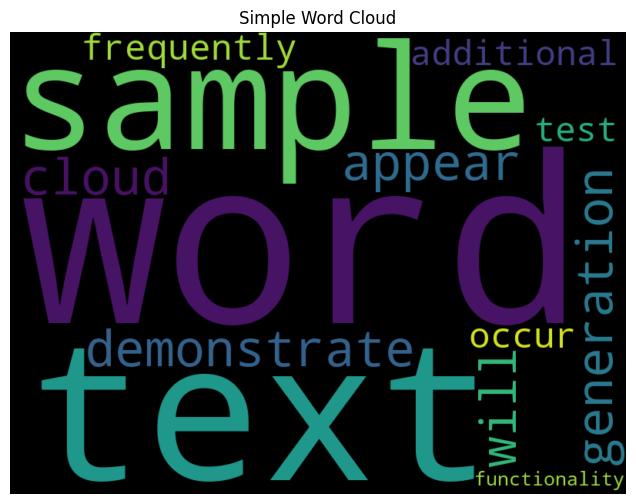

In [48]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Sample text (replace with your own text data)
text = """This is a sample text to demonstrate word cloud generation. 
Words will appear more frequently the more they occur in the text.
Here are some additional words to test the functionality. 
"""

# Lowercase the text and remove stop words
stopwords = set(STOPWORDS)
words = [word for word in text.lower().split() if word not in stopwords]

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=600, background_color='BLACK').generate(
    " ".join(words)
)

# Display the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Simple Word Cloud")
plt.show()


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Choose the number of features as needed
X = tfidf_vectorizer.fit_transform(df['tweet']).toarray()
y = df['Feedback']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the model's performance on the training data
y_pred_train = model.predict(X_train)

# Print accuracy and other metrics
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Classification Report:")
print(classification_report(y_train, y_pred_train))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

Training Accuracy: 0.6343388129311415
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.75      0.70     17252
           1       0.63      0.66      0.64     15423
           2       0.63      0.57      0.60     13812
           3       0.59      0.47      0.52      9904

    accuracy                           0.63     56391
   macro avg       0.63      0.61      0.62     56391
weighted avg       0.63      0.63      0.63     56391

Confusion Matrix:
[[12956  1701  1542  1053]
 [ 2119 10231  1901  1172]
 [ 2459  2397  7893  1063]
 [ 1996  2037  1180  4691]]


In [53]:
# Create a new text input to predict
new_text = ['pfizer company is good']

# Vectorize the new text input using the same TF-IDF vectorizer
new_text_vectorized = tfidf_vectorizer.transform(new_text).toarray()

# Predict using the trained logistic regression model
predicted_label = model.predict(new_text_vectorized)

print("Predicted Label:", predicted_label)

Predicted Label: [1]
